In [1]:
import sys
from os import path
sys.path.append("..")

import matplotlib.pyplot as plt
plt.style.use('research')

import numpy as np
from sklearn import datasets

%load_ext autoreload
%autoreload

In [2]:
X, y = datasets.make_blobs(n_samples=2000, centers=[[-1, -1], [3, 1]], 
                           cluster_std=[1, 1], random_state=3)
y[y == 0] = -1

n_label = 10
n_unlabel = 1000

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

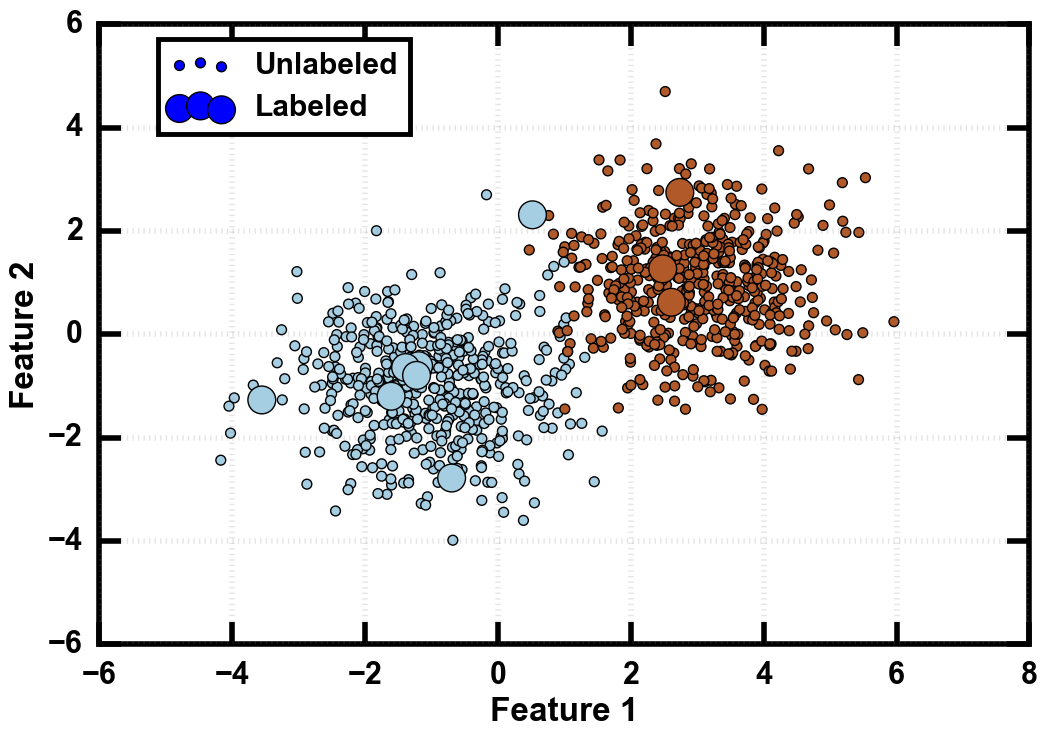

In [3]:
fig = plt.figure()

plt.scatter(X_unlabel[:,0], X_unlabel[:,1], c=y_unlabel, cmap=plt.cm.Paired, s=50, lw=1)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=400, lw=1)
plt.legend(['Unlabeled', 'Labeled'], bbox_to_anchor=(.35,1))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/blobs_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [4]:
def plt_decision_boundry(model, X, kernel='linear'):
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    # Determine decision boundry
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    b_test = np.c_[XX.ravel(), YY.ravel()]
    
    if kernel == 'rbf':
        b_test = x_to_rbf(b_test, n=50, gamma=1.0)
    
    Z = model.decision_function(b_test)

    # Put the result into a color plot
    Z = np.asarray(Z)
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

Score adding 1000 unlabled samples: 0.985858585859


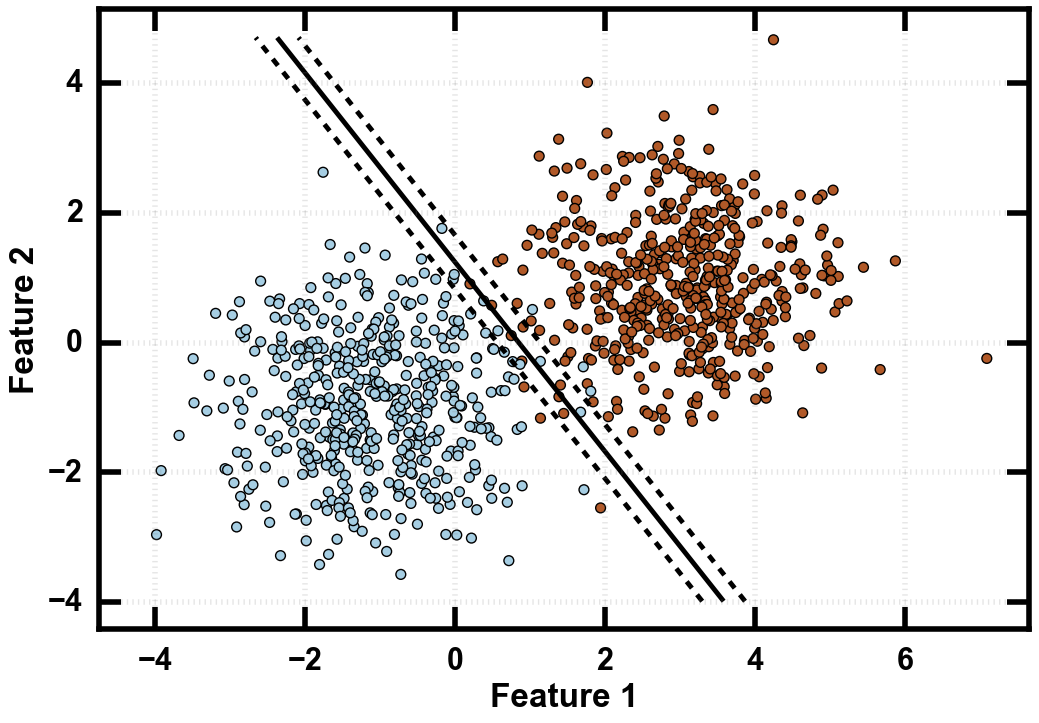

In [5]:
from svm.s3vm import S3VM_SGD
%autoreload

s3vm = S3VM_SGD(knn=3, eta0=1, alpha=0.001, buffer_size=50)
num = 1000
s3vm.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm.score(X_test, y_test))

fig = plt.figure()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, lw=1, s=50)
plt_decision_boundry(s3vm, X)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/blobs_s3vm.pdf', format='pdf', dpi=1200, bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0: -3.1505e+00 -6.0917e+02  2e+03  7e-01  5e-15
 1:  1.5956e+01 -1.2470e+02  2e+02  3e-02  2e-14
 2:  4.2300e+00 -1.0239e+01  1e+01  9e-04  3e-15
 3:  1.0710e-01 -1.6689e+00  2e+00  4e-16  2e-15
 4: -3.7054e-01 -5.6231e-01  2e-01  2e-16  7e-16
 5: -4.3460e-01 -4.5303e-01  2e-02  1e-16  4e-16
 6: -4.4836e-01 -4.4906e-01  7e-04  2e-16  8e-16
 7: -4.4868e-01 -4.4869e-01  7e-06  2e-16  5e-16
 8: -4.4868e-01 -4.4868e-01  7e-08  2e-16  9e-16
Optimal solution found.
Score using label and QP: 0.964646464646


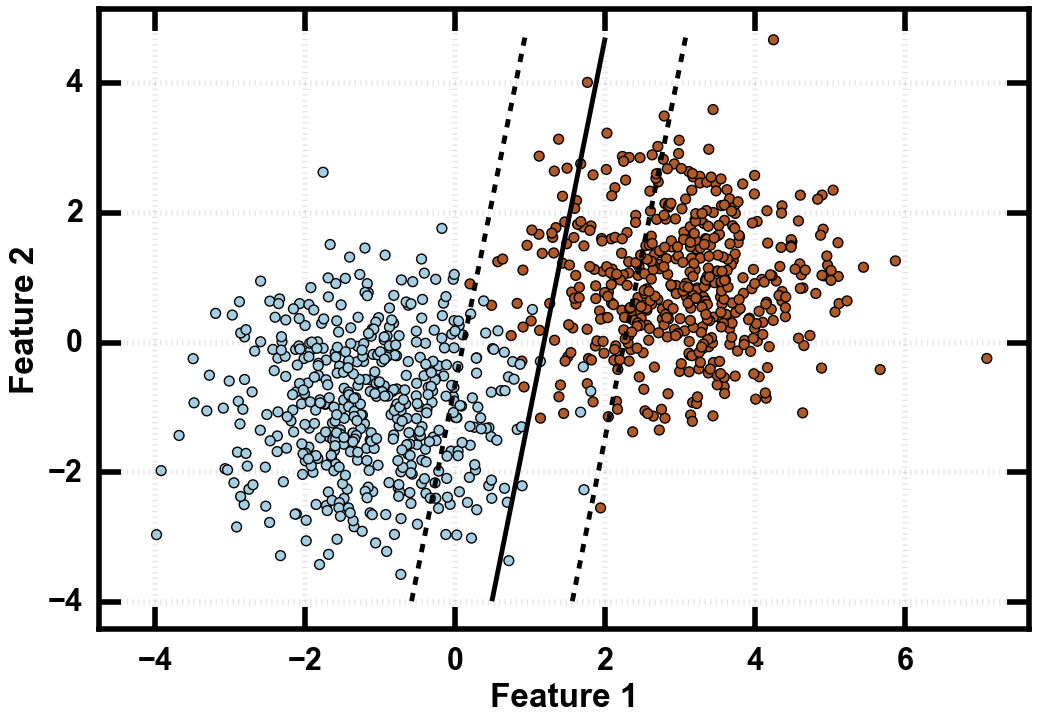

In [6]:
from svm.svm_custom import SVM

mysvm = SVM(C=10)
mysvm.fit(X_label, y_label)

print('Score using label and QP:', mysvm.score(X_test, y_test))

fig = plt.figure()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, lw=1, s=50)
plt_decision_boundry(mysvm, X)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/blobs_svm.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [7]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures

def x_to_poly(x, degree=2):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(x)

def x_to_rbf(x, gamma=1.0, n=100):
    rbf_feature = RBFSampler(gamma=gamma, n_components=n, random_state=1)
    return rbf_feature.fit_transform(x)

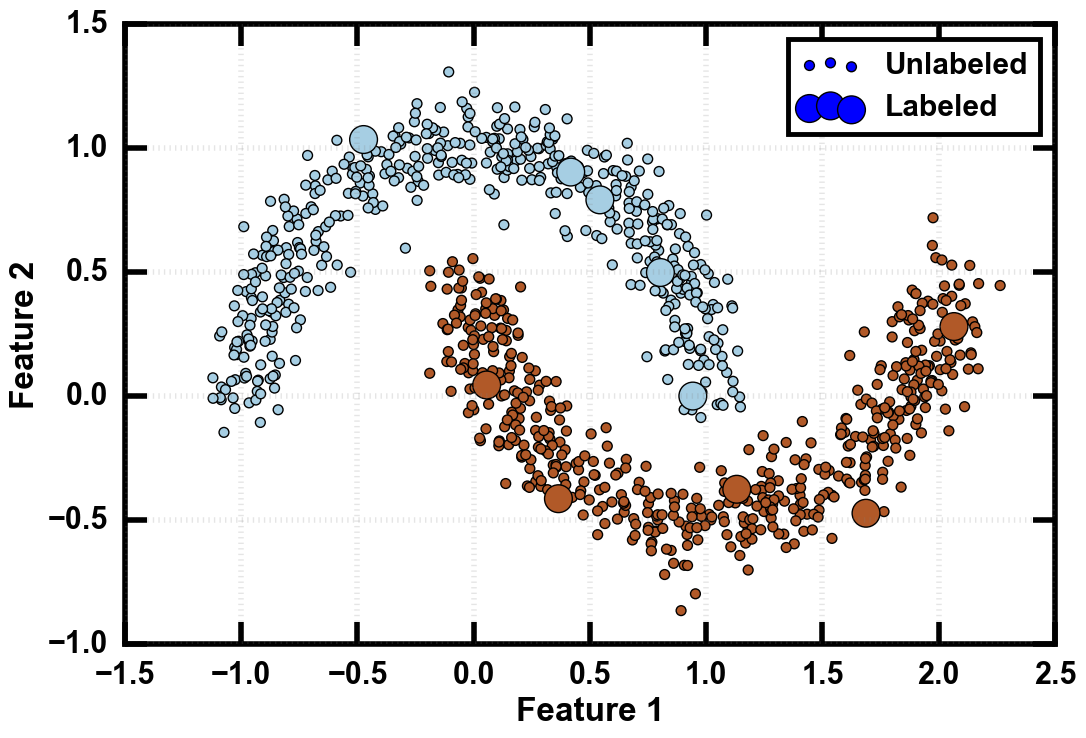

In [8]:
X, y = datasets.make_moons(n_samples=10000, noise=0.1, random_state=3)
y[y == 0] = -1

n_label = 10
n_unlabel = 7000

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

fig = plt.figure()

plt.scatter(X_unlabel[:1000,0], X_unlabel[:1000,1], c=y_unlabel[:1000], cmap=plt.cm.Paired, s=50, lw=1)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=400, lw=1)
plt.legend(['Unlabeled', 'Labeled'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

X_label_tran = x_to_rbf(X_label, n=50, gamma=1.0)
X_unlabel_tran = x_to_rbf(X_unlabel, n=50, gamma=1.0)
X_train_tran = x_to_rbf(X_train, n=50, gamma=1.0)
X_test_tran = x_to_rbf(X_test, n=50, gamma=1.0)

fig.savefig('figs/moons_all.png', format='png', dpi=1200, bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0:  1.2710e+02 -8.4611e+02  1e+03  4e-15  7e-15
 1:  1.1329e+01 -1.0540e+02  1e+02  3e-15  3e-15
 2: -1.3281e+01 -3.4908e+01  2e+01  2e-15  1e-15
 3: -2.3739e+01 -2.7111e+01  3e+00  7e-15  2e-15
 4: -2.4602e+01 -2.4670e+01  7e-02  2e-15  2e-15
 5: -2.4623e+01 -2.4624e+01  9e-04  1e-16  2e-15
 6: -2.4624e+01 -2.4624e+01  9e-06  2e-15  2e-15
Optimal solution found.
Score on labeled data QP: 0.836789297659


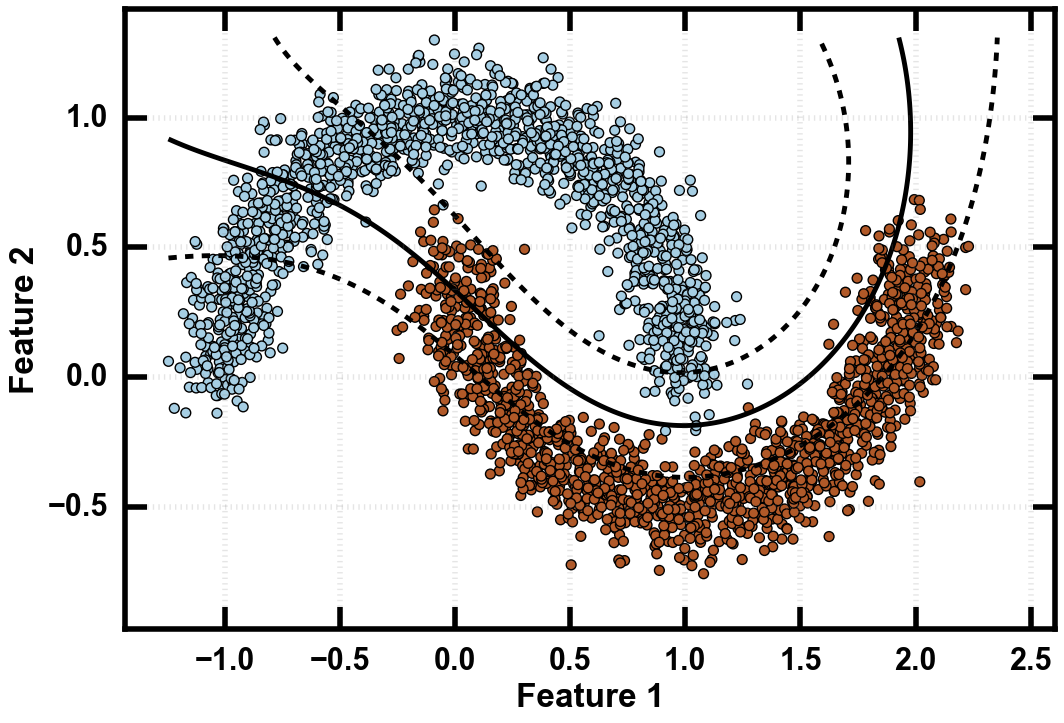

In [9]:
mysvm = SVM(C=20, kernel='rbf')
mysvm.fit(X_label, y_label)

print('Score on labeled data QP:', mysvm.score(X_test, y_test))

fig = plt.figure()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, lw=1, s=50)
plt_decision_boundry(mysvm, X)
# plt.title('Standard SVM on Trained on Labeled MooData')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/moons_svm.png', format='png', dpi=1200, bbox_inches='tight')

Score adding 5000 unlabled samples: 0.995986622074


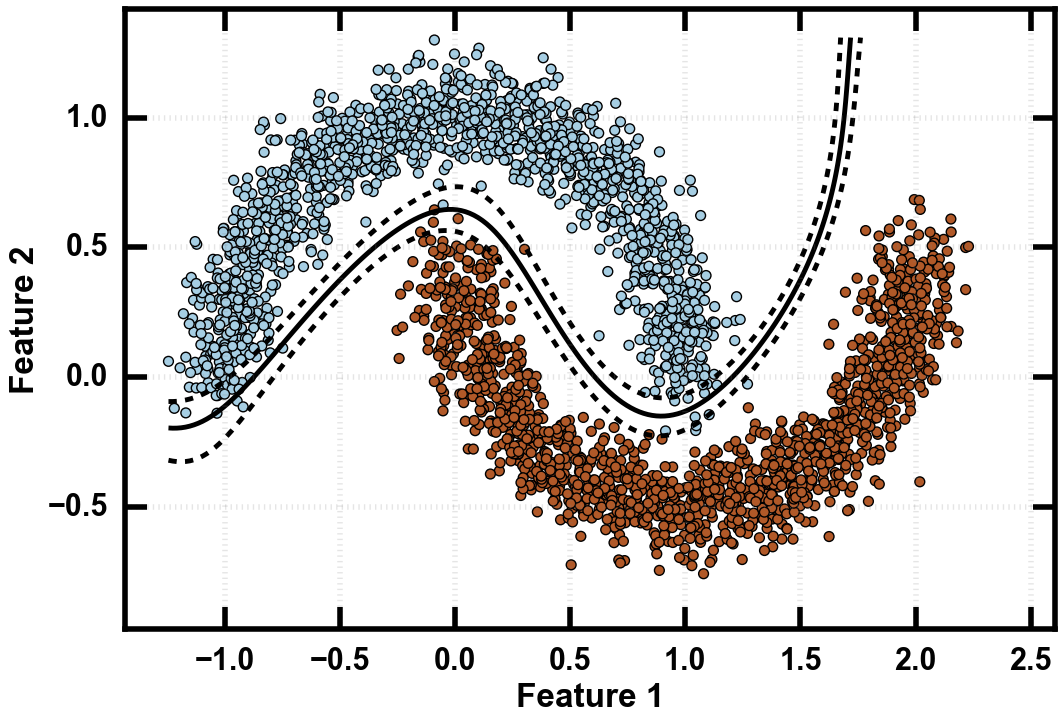

In [10]:
s3vm = S3VM_SGD(knn=1, eta0=10, alpha=0.0001, buffer_size=50, kernel='rbf', gamma=1.0)
%autoreload

num = 5000
s3vm.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm.score(X_test, y_test))

fig = plt.figure()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, lw=1, s=50)
plt_decision_boundry(s3vm, X)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/moons_s3vm.png', format='png', dpi=1200, bbox_inches='tight')

In [11]:
X, y = datasets.make_circles(n_samples=6000, factor=0.25, noise=0.15, random_state=5)
y[y == 0] = -1

n_label = 10
n_unlabel = 5000

X_label = X[:n_label]
y_label = y[:n_label]

X_unlabel = X[n_label:n_label+n_unlabel]
y_unlabel = y[n_label:n_label+n_unlabel]

X_train = X[:n_label+n_unlabel]
y_train = y[:n_label+n_unlabel]

X_test = X[n_label+n_unlabel:]
y_test = y[n_label+n_unlabel:]

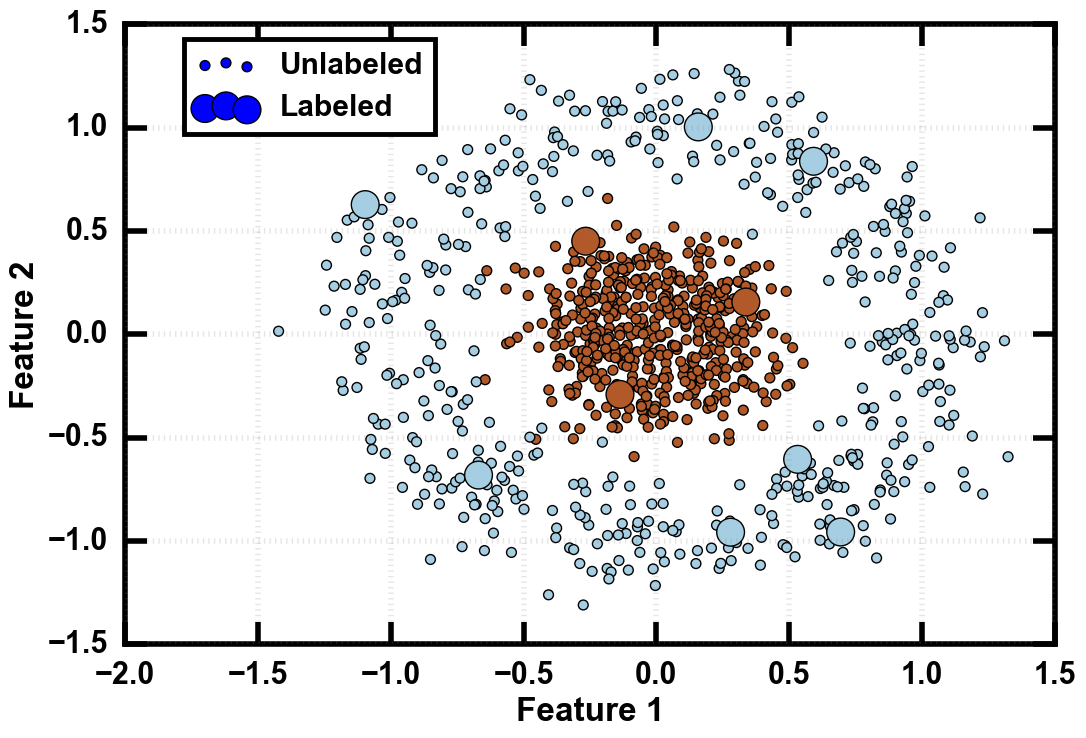

In [12]:
fig = plt.figure()

plt.scatter(X_unlabel[0:1000,0], X_unlabel[0:1000,1], c=y_unlabel[0:1000], cmap=plt.cm.Paired, s=50, lw=1)
plt.scatter(X_label[:,0], X_label[:,1], c=y_label, cmap=plt.cm.Paired, s=400, lw=1)
plt.legend(['Unlabeled', 'Labeled'], bbox_to_anchor=(.35,1))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/circles_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')

Score adding 3000 unlabled samples: 0.931313131313


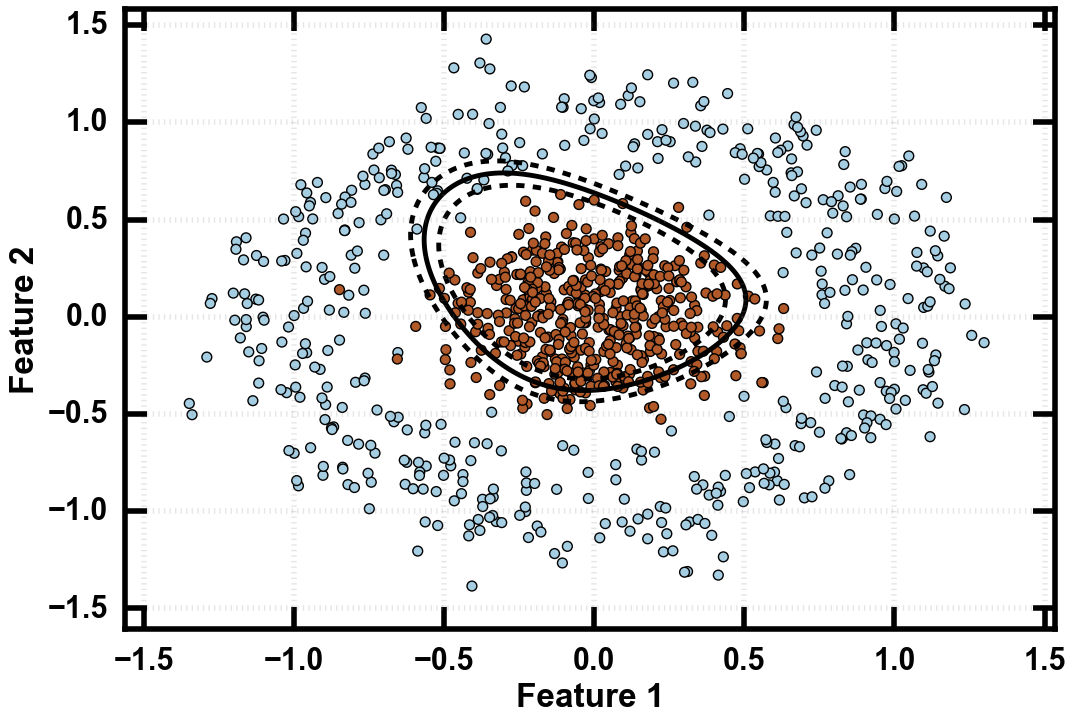

In [13]:
from svm.s3vm_fp import S3VM_SGD_FP
%autoreload

s3vm_fp = S3VM_SGD_FP(knn=1, eta0=10, alpha=0.0001, buffer_size=50, kernel='rbf', 
        gamma=1.0, bXin=0, bXtran=0, bWeights=0, bWeights_tran=0)

num = 3000
s3vm_fp.fit(X_label, y_label, X_unlabel[:num])

print('Score adding', num, 'unlabled samples:', s3vm_fp.score(X_test, y_test))

fig = plt.figure()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, s=50, lw=1)
plt_decision_boundry(s3vm_fp, X)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/circles_s3vm.pdf', format='pdf', dpi=1200, bbox_inches='tight')

     pcost       dcost       gap    pres   dres
 0:  5.2557e+01 -1.1394e+03  1e+03  1e-14  4e-15
 1:  1.9237e+01 -1.2179e+02  1e+02  2e-15  2e-15
 2: -9.8215e+00 -2.7244e+01  2e+01  1e-15  9e-16
 3: -1.2883e+01 -1.5376e+01  2e+00  7e-16  6e-16
 4: -1.3642e+01 -1.3854e+01  2e-01  1e-16  7e-16
 5: -1.3689e+01 -1.3704e+01  1e-02  2e-15  1e-15
 6: -1.3691e+01 -1.3692e+01  1e-03  1e-15  5e-16
 7: -1.3691e+01 -1.3691e+01  1e-05  3e-16  5e-16
 8: -1.3691e+01 -1.3691e+01  1e-07  1e-15  5e-16
Optimal solution found.
Score on labeled data QP: 0.970707070707


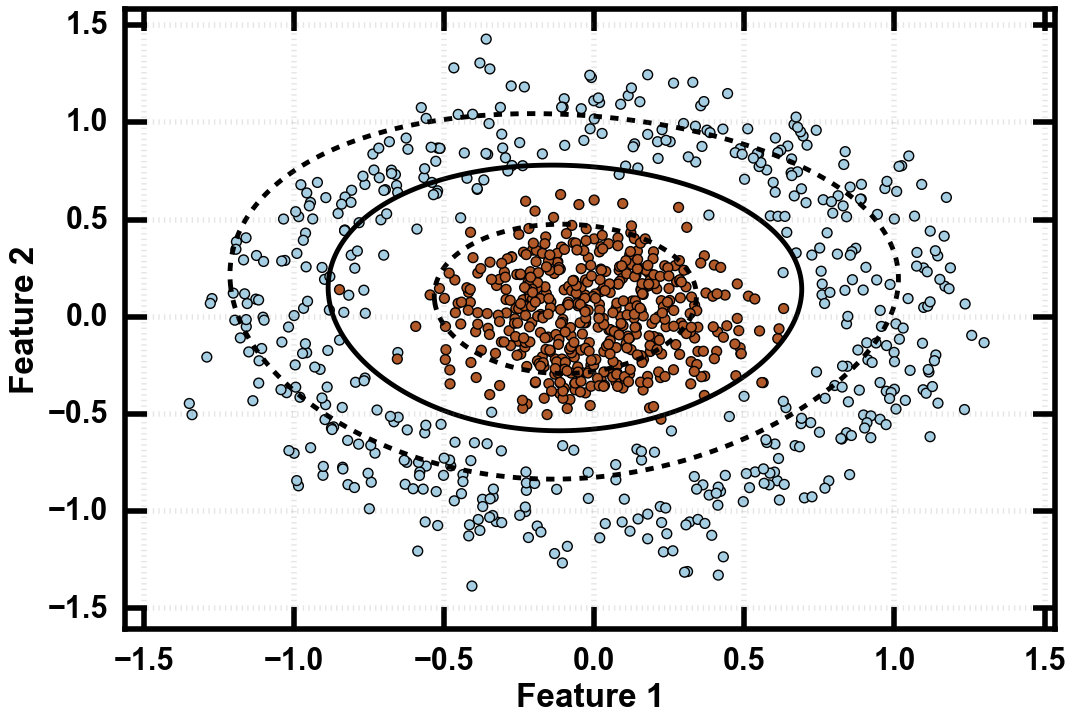

In [14]:
mysvm = SVM(C=20, kernel='rbf')
mysvm.fit(X_label, y_label)

print('Score on labeled data QP:', mysvm.score(X_test, y_test))

fig = plt.figure()

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired, s=50, lw=1)
plt_decision_boundry(mysvm, X)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

fig.savefig('figs/circles_svm.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [15]:
from svm.qns3vm import QN_S3VM
import random

my_random_generator = random.Random()
my_random_generator.seed(0)

model = QN_S3VM(list(X_label), list(y_label), list(X_unlabel), my_random_generator,
                lam=0.0009765625, lamU=1, kernel_type="RBF", sigma=0.5,  estimate_r=0.0,)
model.train()

x=5

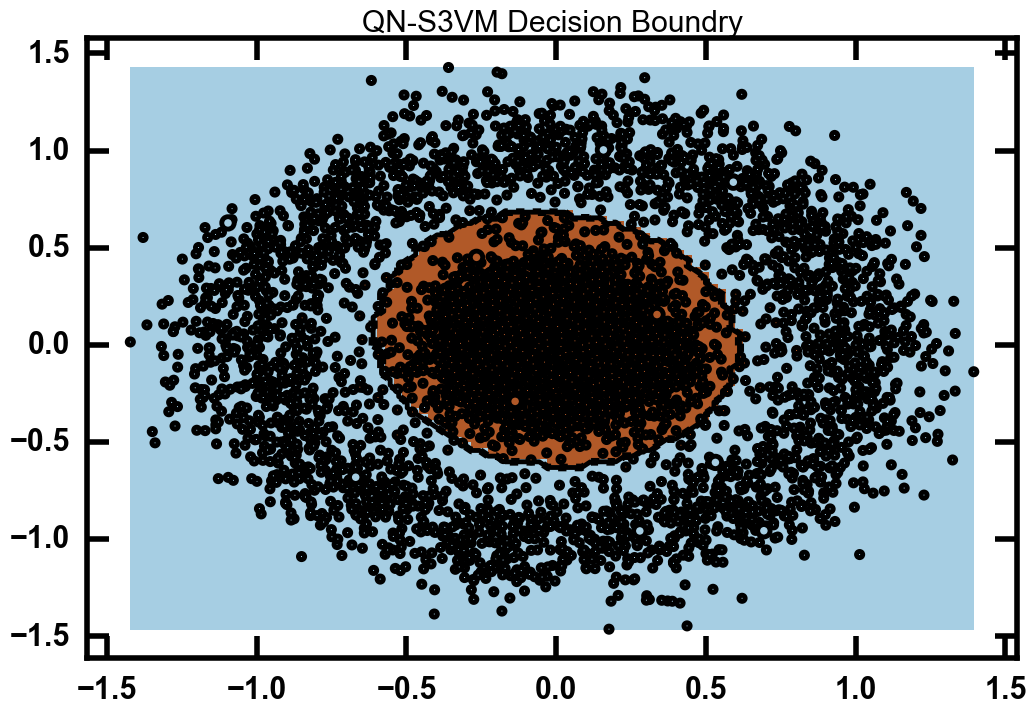

Error Rate 0.010101010101
Score 0.989898989899


In [16]:
# Visualization of the decision boundry

# Plot labeled data
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
plt.scatter(X_label[:, 0], X_label[:, 1], c=y_label, s=80, cmap=plt.cm.Paired, zorder=10)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Plot decision boundry
XX, YY = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])
Z = model.getPredictions(b_test, real_valued=True)

# Put the result into a color plot
Z = np.asarray(Z)
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.title('QN-S3VM Decision Boundry')
plt.show()

preds = np.asarray(model.getPredictions(X_test))
error_cnt = np.sum(preds != y_test)
error = error_cnt / y_test.size
print('Error Rate', error)
print('Score', 1-error)